In [1]:
import pandas as pd
from scipy.stats import shapiro
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd




alz_df=pd.read_csv('E:/Downloads/Alzheimers Mice Data.csv')

alz_df.head()

,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13


<h2>2B ANOVA - Memory Day</h2>

<h3>Assumptions:</h3>
1.You have one dependent variable that is measured at the continuous level (i.e., the interval or ratio level).

2. You have two independent variables where each independent variable consists of two or more categorical, independent groups. An independent variable with only two groups is known as a dichotomous variable whereas an independent variable with three or more groups is referred to as a polytomous variable.

3. You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.

4. There should be no significant outliers in any cell of the design.

5. The distribution of the dependent variable (residuals) should be approximately normally distributed in every cell of the design. 

6. The variance of the dependent variable (residuals) should be equal in every cell of the design.

<h3>Null and Alternative Hypotheses</h3>
<h4>Null hypothesis:</h4> There is no significant interaction effect on memory day between drug treatment and AD status.
<h4>Alternative Hypothesis:</h4> There is a significant interaction effect on memory day between drug treatment and AD status.

<h3>Dataset and Problem</h3>
This analysis utilizes Python to explore and investigate the connection of drug treatment and AD status to their respective interaction on memory day. We aim to determine if there are underlying statistical differences in political interest with each independent group (drug treatment, AD status) and if there is any interaction effect between the two groups. 





<h2>Assumptions:</h2>
<b>Assumption #1:</b> You have one dependent variable that is measured at the continuous level. 

<b>Remark.</b> The given dataset has one dependent variable memory day. The stated variable is dependent on the two given variables, drug treatment, AD status, and is at continuous level. This satisfies the assumption #1. 

<b>Assumption #2:</b> You have two independent variables where each independent variable consists of two or more categorical, independent groups.  

<b>Remark.</b> The dataset consists of two independent variables, the drug treatment and AD status. The AD status consists of 2 independent groups, 1, and 2, making it a dichotomous variable. On the other hand, the independent variable drug treatment has four independent groups 1,2,3, and 4. These two independent variables are the basis of the dependent variable memory day.  This satisfies the assumption #2. 


<b>Assumption #3:</b> You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.

<b>Remark.</b> For the dataset given, each observation represents a unique individual value for the two independent variables. There is no indication that each independent group correlates with each other. The two independent groups for gender provide specific values, and are recorded independently with each other. It is the same with the case of drug treatment 1, 2, 3, and 4. This satisfies the assumption of independence for 2-way ANOVA.  


# Assumption 4
<b>Assumption #4:</b> There should be no significant outliers in any cell of the design.

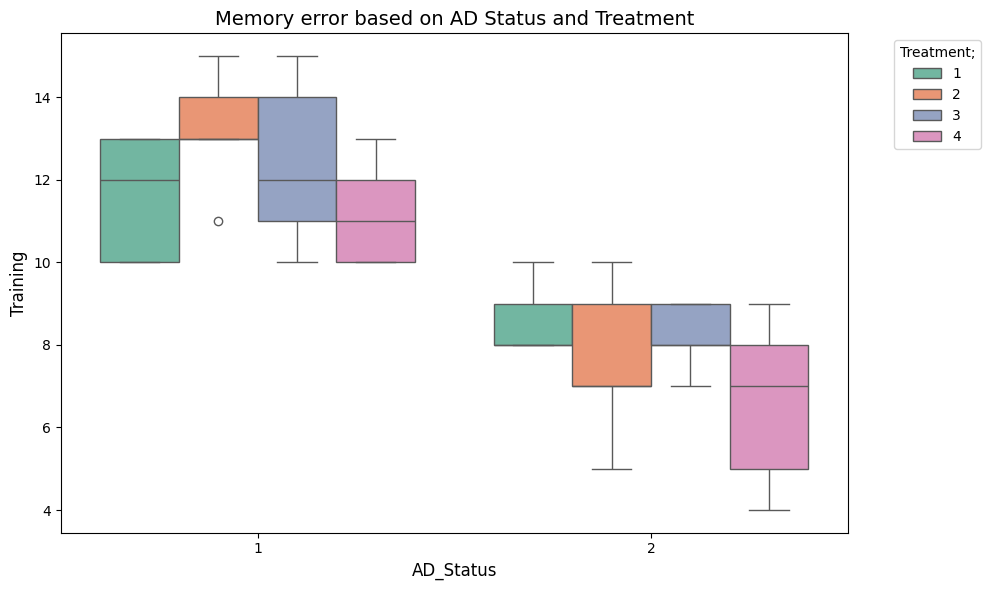

In [16]:

plt.figure(figsize=(10, 6))

sns.boxplot(x='AD_Status', y='Memory', hue='Treatment', data=df, palette="Set2", dodge=True)

plt.title("Memory error based on AD Status and Treatment", fontsize=14)
plt.xlabel("AD_Status", fontsize=12)
plt.ylabel("Training", fontsize=12)
plt.legend(title="Treatment;", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<b>Remark.</b>  There is a significant outlier with the 1 AD status, but since it is not an extreme outlier, all fall within the range and are valid.

# Assumption 5
<b>Assumption #5:</b> The distribution of the dependent variable (residuals) should be approximately normally distributed in every cell of the design. 


In [4]:
normality ={}
for i in df['Treatment'].unique():
    for j in df['AD_Status'].unique():
        group_normal=df[(df['Treatment'] == i) & (df['AD_Status'] == j)]['Memory']
        stat, p_value = shapiro(group_normal)
        normality[(int(i), int(j))] = {'Statistic': float(stat), 'p-value': float(p_value)}

display(normality)

{(1, 1): {'Statistic': 0.8029904417735476, 'p-value': 0.08569260402621937},
 (1, 2): {'Statistic': 0.7709079337590306, 'p-value': 0.04595431783856295},
 (2, 1): {'Statistic': 0.9556271474166738, 'p-value': 0.7772534037372361},
 (2, 2): {'Statistic': 0.9529604619046342, 'p-value': 0.7583121101708065},
 (3, 1): {'Statistic': 0.9523514916285045, 'p-value': 0.7539729964660309},
 (3, 2): {'Statistic': 0.8810376385817489, 'p-value': 0.3140395561440371},
 (4, 1): {'Statistic': 0.9020198201298121, 'p-value': 0.4211496535161197},
 (4, 2): {'Statistic': 0.9523514916285045, 'p-value': 0.7539729964660309}}

<b>Remark.</b> The dependent variable, memory day, is approximately normally distributed for each combination of their AD status to the respective drug treatment except for 1,2. And as assessed by the Shapiro-Wilk test of normality, (p > 0.05), all fall within the prescribed basis of greater than 0.05, except for the only combination not normally distributed, this means it violates the assumption #5. 

# Assumption 6 (Levene's Test)
<b>Assumption #6:  </b>The variance of the dependent variable (residuals) should be equal in every cell of the design.

In [6]:

group_levene = [df[(df['Treatment'] == i) & (df['AD_Status'] == j)]['Memory']
          for i in df['Treatment'].unique() for j in df['AD_Status'].unique()]

levene_stat, levene_p = levene(*group_levene)
float(levene_stat), float(levene_p)
print(f"Statistic: {levene_stat} p-value: {levene_p}")

Statistic: 0.8274582560296847 p-value: 0.5722200263972536


<b>Remark.</b> As assessed by Levene’s test of equality of variances, p = 0.572, then the variances for each combination of the AD status and drug treatment are homogenous.

<h2>Reporting:</h2>
The analysis for Memory Day was conducted; however, Assumption 5 (homogeneity of variances) was violated, as determined through Levene's Test for Homogeneity. Due to this violation, the results of the ANOVA are not considered valid, and the null hypothesis for the effects of AD Status, Treatment, and their interaction on memory performance cannot be reliably tested.
No further analysis or interpretation was conducted for Memory Day, as the violation of the assumption invalidates the statistical model used.
